# ML Capstone Project E-Commerce

### Import Libreries

In [1]:
! pip install scikit-learn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

## Introduction

The electronics store's dataset focuses on customer purchase history, aiming to improve marketing strategies and customer experience in its e-commerce platform. By analyzing this data, the store aims to better understand customer behaviors and preferences, ultimately increasing sales and fostering customer loyalty through targeted marketing and enhanced user experience.

## Business Problem 

Based on the data, we aim to refine marketing strategies by identifying customer preferences and behavior patterns. Additionally, we seek to improve customer experience through personalized recommendations and streamlined purchasing processes.

## Data Dictionary

In [4]:
import pandas as pd
# Use a raw string literal or double backslashes in the file path
data_dict_path = r'C:\DataAna\ML_Capstone_E-commerce_Analytics\Data\data-dic.csv'

# Read the data dictionary into a pandas DataFrame
data_dict = pd.read_csv(data_dict_path)

# Display the data dictionary
data_dict

,Column_Name,Description
0,event_time,Represents the timestamp indicating the occur...
1,order_id,A unique identifier assigned to each order fa...
2,product_id,Unique identification for each product purcha...
3,category_id,An exclusive identifier for the category of e...
4,category_code,Possibly a textual or descriptive representat...
5,brand,Signifies the brand of the product important ...
6,price,The selling price of the product. Essential f...
7,user_id,A distinctive identifier assigned to each cus...


### Data Ingestion

In [5]:
data=pd.read_csv(r'C:\DataAna\ML_Capstone_E-commerce_Analytics\Data\kz.csv')
data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2.294360e+18,1.515970e+18,2.268110e+18,electronics.tablet,samsung,162.01,1.515920e+18
1,2020-04-24 11:50:39 UTC,2.294360e+18,1.515970e+18,2.268110e+18,electronics.tablet,samsung,162.01,1.515920e+18
2,2020-04-24 14:37:43 UTC,2.294440e+18,2.273950e+18,2.268110e+18,electronics.audio.headphone,huawei,77.52,1.515920e+18
3,2020-04-24 14:37:43 UTC,2.294440e+18,2.273950e+18,2.268110e+18,electronics.audio.headphone,huawei,77.52,1.515920e+18
4,2020-04-24 19:16:21 UTC,2.294580e+18,2.273950e+18,2.268110e+18,NaN,karcher,217.57,1.515920e+18
...,...,...,...,...,...,...,...,...
1048570,2020-05-12 07:16:25 UTC,2.353220e+18,1.515970e+18,NaN,57.87,NaN,NaN,NaN
1048571,2020-05-12 07:08:37 UTC,2.353220e+18,1.515970e+18,2.268110e+18,electronics.smartphone,oppo,231.23,NaN
1048572,2020-05-12 09:11:47 UTC,2.353220e+18,2.273950e+18,2.268110e+18,appliances.kitchen.refrigerators,samsung,520.81,NaN
1048573,2020-05-12 06:43:09 UTC,2.353220e+18,1.515970e+18,2.268110e+18,NaN,rowenta,55.53,NaN


### Data Understanding

In [6]:
data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2.294360e+18,1.515970e+18,2.268110e+18,electronics.tablet,samsung,162.01,1.515920e+18
1,2020-04-24 11:50:39 UTC,2.294360e+18,1.515970e+18,2.268110e+18,electronics.tablet,samsung,162.01,1.515920e+18
2,2020-04-24 14:37:43 UTC,2.294440e+18,2.273950e+18,2.268110e+18,electronics.audio.headphone,huawei,77.52,1.515920e+18
3,2020-04-24 14:37:43 UTC,2.294440e+18,2.273950e+18,2.268110e+18,electronics.audio.headphone,huawei,77.52,1.515920e+18
4,2020-04-24 19:16:21 UTC,2.294580e+18,2.273950e+18,2.268110e+18,NaN,karcher,217.57,1.515920e+18


In [7]:
data.tail()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
1048570,2020-05-12 07:16:25 UTC,2.353220e+18,1.515970e+18,NaN,57.87,NaN,NaN,NaN
1048571,2020-05-12 07:08:37 UTC,2.353220e+18,1.515970e+18,2.268110e+18,electronics.smartphone,oppo,231.23,NaN
1048572,2020-05-12 09:11:47 UTC,2.353220e+18,2.273950e+18,2.268110e+18,appliances.kitchen.refrigerators,samsung,520.81,NaN
1048573,2020-05-12 06:43:09 UTC,2.353220e+18,1.515970e+18,2.268110e+18,NaN,rowenta,55.53,NaN
1048574,2020-05-12 06:43:09 UTC,2.353220e+18,1.515970e+18,2.268110e+18,NaN,provence,3.91,NaN


In [8]:
data.describe()

,order_id,product_id,category_id,price,user_id
count,1.048575e+06,1.048575e+06,8.502280e+05,850228.000000,1.071590e+05
mean,2.347997e+18,1.678272e+18,2.273988e+18,135.998778,1.515920e+18
std,5.662879e+15,3.111070e+17,2.399669e+16,215.911911,2.560012e+02
min,2.294360e+18,1.515970e+18,2.268110e+18,0.000000,1.515920e+18
25%,2.348780e+18,1.515970e+18,2.268110e+18,13.400000,1.515920e+18
50%,2.348800e+18,1.515970e+18,2.268110e+18,47.200000,1.515920e+18
75%,2.348820e+18,1.515970e+18,2.268110e+18,162.010000,1.515920e+18
max,2.353220e+18,2.349250e+18,2.374500e+18,18328.680000,1.515920e+18


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   event_time     1048575 non-null  object 
 1   order_id       1048575 non-null  float64
 2   product_id     1048575 non-null  float64
 3   category_id    850228 non-null   float64
 4   category_code  789495 non-null   object 
 5   brand          814816 non-null   object 
 6   price          850228 non-null   float64
 7   user_id        107159 non-null   float64
dtypes: float64(5), object(3)
memory usage: 64.0+ MB


### Data Cleaning

### Handle Duplicates

In [11]:
data.drop_duplicates()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2.294360e+18,1.515970e+18,2.268110e+18,electronics.tablet,samsung,162.01,1.515920e+18
2,2020-04-24 14:37:43 UTC,2.294440e+18,2.273950e+18,2.268110e+18,electronics.audio.headphone,huawei,77.52,1.515920e+18
4,2020-04-24 19:16:21 UTC,2.294580e+18,2.273950e+18,2.268110e+18,NaN,karcher,217.57,1.515920e+18
5,2020-04-26 08:45:57 UTC,2.295720e+18,1.515970e+18,2.268110e+18,furniture.kitchen.table,maestro,39.33,1.515920e+18
6,2020-04-26 09:33:47 UTC,2.295740e+18,1.515970e+18,2.268110e+18,electronics.smartphone,apple,1387.01,1.515920e+18
...,...,...,...,...,...,...,...,...
1048570,2020-05-12 07:16:25 UTC,2.353220e+18,1.515970e+18,NaN,57.87,NaN,NaN,NaN
1048571,2020-05-12 07:08:37 UTC,2.353220e+18,1.515970e+18,2.268110e+18,electronics.smartphone,oppo,231.23,NaN
1048572,2020-05-12 09:11:47 UTC,2.353220e+18,2.273950e+18,2.268110e+18,appliances.kitchen.refrigerators,samsung,520.81,NaN
1048573,2020-05-12 06:43:09 UTC,2.353220e+18,1.515970e+18,2.268110e+18,NaN,rowenta,55.53,NaN


### Null Value Treatment

In [14]:
data.dropna()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2.294360e+18,1.515970e+18,2.268110e+18,electronics.tablet,samsung,162.01,1.515920e+18
1,2020-04-24 11:50:39 UTC,2.294360e+18,1.515970e+18,2.268110e+18,electronics.tablet,samsung,162.01,1.515920e+18
2,2020-04-24 14:37:43 UTC,2.294440e+18,2.273950e+18,2.268110e+18,electronics.audio.headphone,huawei,77.52,1.515920e+18
3,2020-04-24 14:37:43 UTC,2.294440e+18,2.273950e+18,2.268110e+18,electronics.audio.headphone,huawei,77.52,1.515920e+18
5,2020-04-26 08:45:57 UTC,2.295720e+18,1.515970e+18,2.268110e+18,furniture.kitchen.table,maestro,39.33,1.515920e+18
...,...,...,...,...,...,...,...,...
1048396,2020-05-12 09:53:32 UTC,2.353220e+18,1.515970e+18,2.268110e+18,appliances.kitchen.kettle,berghoff,9.00,1.515920e+18
1048413,2020-05-12 07:54:00 UTC,2.353220e+18,1.515970e+18,2.268110e+18,electronics.audio.headphone,samsung,81.00,1.515920e+18
1048434,2020-05-12 06:00:11 UTC,2.353220e+18,1.515970e+18,2.268110e+18,electronics.smartphone,huawei,300.90,1.515920e+18
1048438,2020-05-12 06:35:24 UTC,2.353220e+18,1.515970e+18,2.268110e+18,electronics.tablet,apple,370.35,1.515920e+18


### Data Type Corrections

In [16]:
data['event_time']=pd.to_datetime(data['event_time'])
data['price']=data['price'].astype(float)
print(data.dtypes)

event_time       datetime64[ns, UTC]
order_id                     float64
product_id                   float64
category_id                  float64
category_code                 object
brand                         object
price                        float64
user_id                      float64
dtype: object


### Distribution For X col

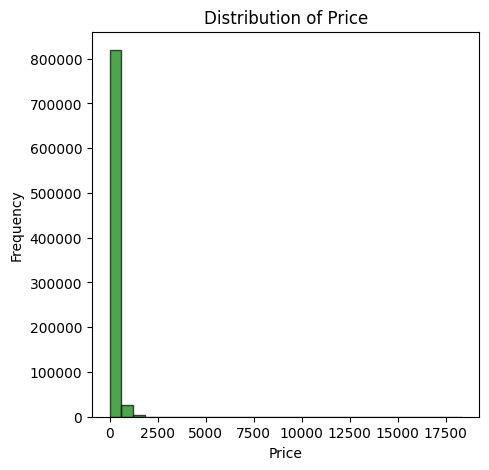

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.hist(data['price'], bins=30, color='green', edgecolor='black',alpha=0.7)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

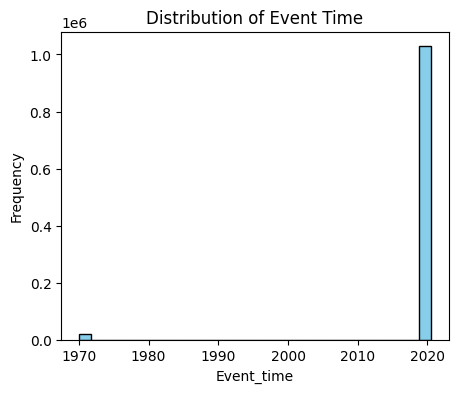

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.hist(data['event_time'],color='skyblue',bins=30,edgecolor='black')
plt.title('Distribution of Event Time')
plt.xlabel('Event_time')
plt.ylabel('Frequency')
plt.show()

Conclusion

The distribution of prices appears to be right-skewed, with a majority of products being priced at lower values and fewer products at higher prices. Regarding the distribution of event times, there seems to be variation in purchase activity over time, potentially indicating periods of higher and lower customer engagement with the e-commerce platform.

### Relation-Scatter Plot/Heat Map

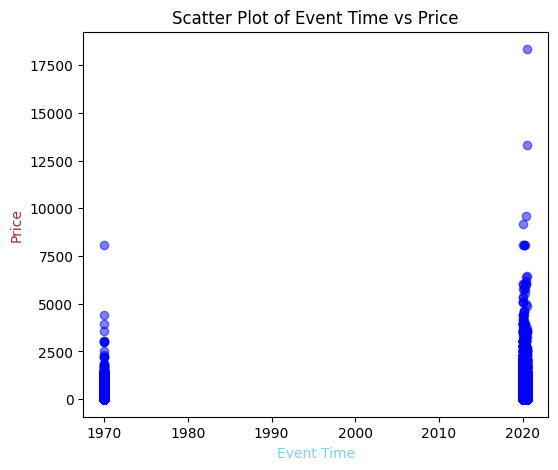

In [20]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(6,5))
plt.scatter(data['event_time'], data['price'], alpha=0.5, color='blue')
plt.title('Scatter Plot of Event Time vs Price')
plt.xlabel('Event Time', color='skyblue')
plt.ylabel('Price', color='brown')
plt.show()


### Problem Statements

How do daily purchase patterns vary throughout the week?
Can we identify any irregularities in order fulfillment using order IDs?
Which products have the highest sales volume, based on product IDs?
Are there any categories with significantly higher sales compared to others?
How does the textual representation of product categories impact sales?
Which brands are most preferred by customers?
Is there a correlation between product prices and sales volume?
How many unique customers have made purchases within the dataset?
What are the purchasing behaviors of individual customers?
Can we identify any trends or patterns in user demographics?
Are there any price points that attract more customers?
How do sales differ between weekdays and weekends?
Which product categories contribute the most to overall revenue?
Are there any product categories experiencing a decline in sales?
Can we segment customers based on their purchase history and preferences?

Problem Statement:1

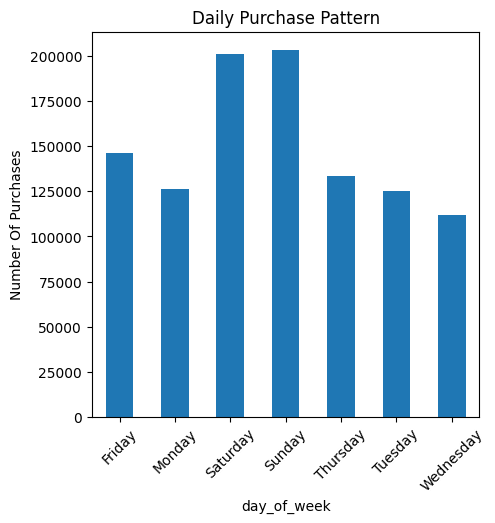

In [22]:
#convert event_time to date time format
data['event_time']=pd.to_datetime(data['event_time'])
#Extract day of week from event time
data['day_of_week']=data['event_time'].dt.day_name()
#Exploratory Data Analysis (EDA)
# Daily purchase patterns
daily_purchase_pattern=data.groupby('day_of_week').size()

# visualize daily perchase pattern

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5,))
daily_purchase_pattern.plot(kind='bar')
plt.title('Daily Purchase Pattern')
plt.xlabel('day_of_week')
plt.ylabel('Number Of Purchases')
plt.xticks(rotation=45)
plt.show()


Problem Statement:2

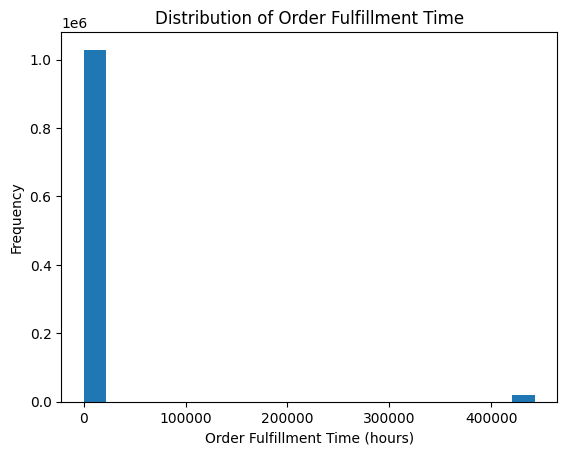

In [23]:
# checking for duplicate order ids
duplicate_orders=data[data.duplicated(subset='order_id',keep=False)]

#Analyze order fulfillment time
data['order_fulfillment_time'] = data.groupby('order_id')['event_time'].transform(lambda x: x.max() - x.min())
# Visualize order fulfillment time
plt.hist(data['order_fulfillment_time'].dt.total_seconds() / 3600, bins=20)
plt.xlabel('Order Fulfillment Time (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Order Fulfillment Time')
plt.show()


Problem Statement:3

In [25]:
import pandas as pd

#Group by product_id and count the occurrences
product_sales = data['product_id'].value_counts()

# Display the products with the highest sales volume
top_products = product_sales.head(5)  # Change 5 to the desired number of top products
print("Top Products by Sales Volume:")
print(top_products)

Top Products by Sales Volume:
product_id
1.515970e+18    824238
2.273950e+18    219789
2.309020e+18      2514
2.298440e+18      1732
2.282010e+18       109
Name: count, dtype: int64


Problem Statement:4

In [27]:
# Group the data by category and calculate the total sales for each category
category_sales = data.groupby('category_code')['price'].sum().reset_index()

# Sort the categories by total sales in descending order
category_sales = category_sales.sort_values(by='price', ascending=False)

# Identify categories with significantly higher sales compared to others
# You can set a threshold for what constitutes "significantly higher" and filter the categories accordingly
threshold = category_sales['price'].mean() + category_sales['price'].std()  # Example threshold (mean + 1 standard deviation)
significant_categories = category_sales[category_sales['price'] > threshold]

print("Categories with significantly higher sales compared to others:")
print(significant_categories)

Categories with significantly higher sales compared to others:
                        category_code        price
354            electronics.smartphone  32268998.26
358              electronics.video.tv  11546709.57
297  appliances.kitchen.refrigerators  10363140.29
325                computers.notebook   8716594.40
300         appliances.kitchen.washer   7002348.34
280     appliances.environment.vacuum   3642285.55
290           appliances.kitchen.hood   2525967.59


Problem Statement:5

                        category_code        price
354            electronics.smartphone  32268998.26
358              electronics.video.tv  11546709.57
297  appliances.kitchen.refrigerators  10363140.29
325                computers.notebook   8716594.40
300         appliances.kitchen.washer   7002348.34
280     appliances.environment.vacuum   3642285.55
290           appliances.kitchen.hood   2525967.59
296           appliances.kitchen.oven   1993232.59
353                electronics.clocks   1738644.62
347       electronics.audio.headphone   1599331.87


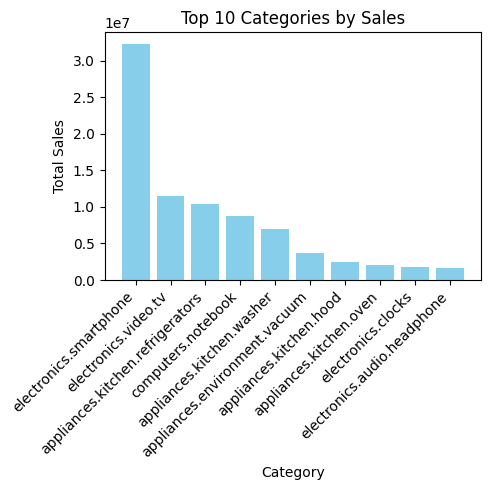

In [18]:
# Group by category_code and calculate total sales (sum of prices)
category_sales = data.groupby('category_code')['price'].sum().reset_index()

# Sort the categories by total sales in descending order
category_sales = category_sales.sort_values(by='price', ascending=False)

# Visualize the top categories by sales
top_categories = category_sales.head(10)  
print(top_categories)

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.bar(top_categories['category_code'], top_categories['price'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Top 10 Categories by Sales')
plt.xticks(rotation=45, ha='right')  # Rotate category labels for better readability
plt.tight_layout()
plt.show()

Problem Statement:6

In [28]:
brand_count=data.groupby('brand').size().reset_index(name='count')
mostPreferred_brand=brand_count.sort_values(by='count' ,ascending=False)
print(mostPreferred_brand)
# or
#top 10m brands
Top_brands=mostPreferred_brand.head(10)
print(Top_brands)

        brand   count
565   samsung  129666
62        ava   42615
635     tefal   29798
296    huawei   27965
37      apple   24935
..        ...     ...
426    millet       1
49   artberry       1
134     cayin       1
430     mobil       1
404   matador       1

[726 rows x 2 columns]
       brand   count
565  samsung  129666
62       ava   42615
635    tefal   29798
296   huawei   27965
37     apple   24935
506  philips   22086
380       lg   19955
451      neo   18728
515  polaris   15155
478     oppo   14420


Problem Statement:7

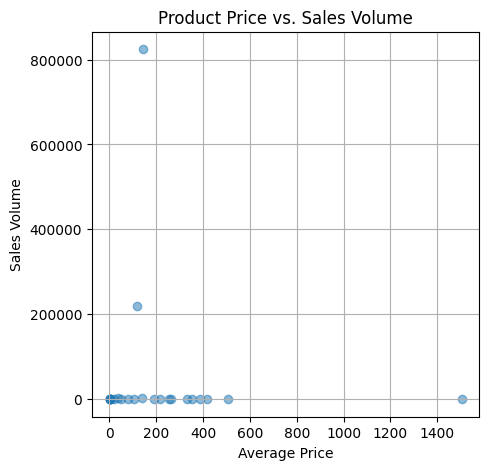

Correlation coefficient: -0.06452716286846186


In [22]:
# Group by product_id, calculate average price and total sales volume
product_stats = data.groupby('product_id').agg({
    'price': 'mean',
    'order_id': 'count'  # assuming each row represents a single purchase
}).rename(columns={'order_id': 'sales_volume'})

# Plot the relationship between average price and sales volume
plt.figure(figsize=(5,5))
plt.scatter(product_stats['price'], product_stats['sales_volume'], alpha=0.5)
plt.title('Product Price vs. Sales Volume')
plt.xlabel('Average Price')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
correlation = product_stats['price'].corr(product_stats['sales_volume'])
print("Correlation coefficient:", correlation)

Problem Statement:8

In [29]:
# Assuming 'user_id' is the column name for user IDs
unique_customers = data['user_id'].nunique()

print("Number of unique customers:", unique_customers)

Number of unique customers: 1


Problem Statement:9

In [30]:
grouped_data=data.groupby('user_id')
total_purchases=grouped_data.size()
total_spending=grouped_data['price'].sum()
average_spending_per_purchase =total_spending / total_purchases

# Calculate number of unique products purchased per user
unique_products = grouped_data['product_id'].nunique()

# Calculate average number of products purchased per user
average_products_per_purchase = grouped_data['product_id'].size() / total_purchases

# Create a DataFrame to store the results
customer_behavior = pd.DataFrame({
    'Total Purchases': total_purchases,
    'Total Spending': total_spending,
    'Avg Spending Per Purchase': average_spending_per_purchase,
    'Unique Products Purchased': unique_products,
    'Avg Products Per Purchase': average_products_per_purchase
})

# Display the DataFrame
print(customer_behavior)


              Total Purchases  Total Spending  Avg Spending Per Purchase  \
user_id                                                                    
1.515920e+18           107159      16139257.8                 150.610381   

              Unique Products Purchased  Avg Products Per Purchase  
user_id                                                             
1.515920e+18                         24                        1.0  


Problem Statement:10

In [31]:
# Calculate the frequency of purchases per user
purchase_frequency = data.groupby('user_id').size().reset_index(name='purchase_count')

# Calculate the total amount spent by each user
total_spent = data.groupby('user_id')['price'].sum().reset_index(name='total_spent')

# Merge the two DataFrames
user_summary = pd.merge(purchase_frequency, total_spent, on='user_id')

# Display the summary
print(user_summary.head())

        user_id  purchase_count  total_spent
0  1.515920e+18          107159   16139257.8


Problem Statement:11

In [28]:
# Grouping the data by price and counting the number of unique user IDs
price_counts = data.groupby('price')['user_id'].nunique().reset_index()

# Sorting the results by the number of unique user IDs in descending order
price_counts_sorted = price_counts.sort_values(by='user_id', ascending=False)

# Displaying the top price points that attract more customers
top_price_points = price_counts_sorted.head(10)
print(top_price_points)

       price  user_id
0       0.00        1
1263  273.82        1
1276  280.30        1
1275  280.07        1
1274  279.38        1
1273  278.91        1
1270  277.75        1
1269  277.55        1
1268  277.52        1
1267  277.31        1


Problem Statement:12

          total_sales  total_orders  avg_sales_per_order
day_type                                                
Weekday   70214619.87          3275         21439.578586
Weekend   45415349.38          1344         33791.182574


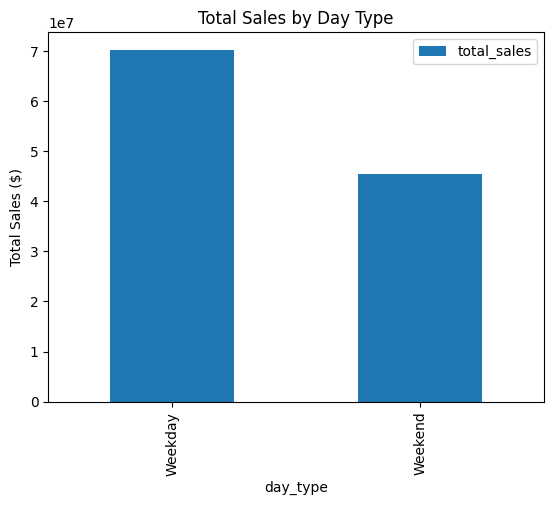

In [32]:
# Convert 'event_time' to datetime format
data['event_time'] = pd.to_datetime(data['event_time'])

# Extract the weekday from 'event_time'
data['weekday'] = data['event_time'].dt.dayofweek  # Monday=0, Sunday=6

# Map weekdays to 'Weekday' or 'Weekend'
data['day_type'] = data['weekday'].map({0: 'Weekday', 1: 'Weekday', 2: 'Weekday', 3: 'Weekday', 4: 'Weekday', 5: 'Weekend', 6: 'Weekend'})

# Group the data by 'day_type' and calculate sales metrics
sales_summary = data.groupby('day_type').agg({'price': 'sum', 'order_id': 'nunique'})

# Rename columns for clarity
sales_summary.rename(columns={'price': 'total_sales', 'order_id': 'total_orders'}, inplace=True)

# Calculate average sales per order
sales_summary['avg_sales_per_order'] = sales_summary['total_sales'] / sales_summary['total_orders']

# Print the sales summary
print(sales_summary)

# Visualize the sales differences
sales_summary.plot(kind='bar', y='total_sales', title='Total Sales by Day Type', ylabel='Total Sales ($)')
plt.show()

Problem Statement:13

In [33]:
# Group by category_code and sum the revenue
category_revenue = data.groupby('category_code')['price'].sum()

# Sort categories by total revenue in descending order
category_revenue_sorted = category_revenue.sort_values(ascending=False)

# Print the top contributing categories
print(category_revenue_sorted.head())

category_code
electronics.smartphone              32268998.26
electronics.video.tv                11546709.57
appliances.kitchen.refrigerators    10363140.29
computers.notebook                   8716594.40
appliances.kitchen.washer            7002348.34
Name: price, dtype: float64


Problem Statement:14

In [34]:
 #Create a pivot table to aggregate sales by category and month
category_sales_pivot = data.pivot_table(index='event_time', columns='category_id', aggfunc='size', fill_value=0)

# Resample the data to monthly frequency and sum the sales for each category
category_sales_monthly = category_sales_pivot.resample('M').sum()

# Calculate the percentage change in sales for each category over the past 12 months
percentage_change = category_sales_monthly.pct_change(periods=12)

#Identify categories experiencing a decline in sales
declining_categories = percentage_change.iloc[-1] < 0

# Print the declining categories
print("Categories experiencing a decline in sales:")
print(declining_categories[declining_categories].index)

Categories experiencing a decline in sales:
Index([], dtype='float64', name='category_id')


C:\Users\geeth\AppData\Local\Temp\ipykernel_8216\2278740146.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  category_sales_monthly = category_sales_pivot.resample('M').sum()


Problem Statement:15

In [35]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values
data.dropna(inplace=True)

# Check if all selected columns exist in the dataset
selected_columns = ['user_id', 'product_id', 'price']
missing_columns = [col for col in selected_columns if col not in data.columns]

if missing_columns:
    raise KeyError(f"Column(s) {', '.join(missing_columns)} not found in the dataset.")

# Feature selection
X = data[selected_columns]

# Data normalization
X_scaled = StandardScaler().fit_transform(X)

# Perform KMeans clustering
data['cluster'] = KMeans(n_clusters=3, random_state=42).fit_predict(X_scaled)

# Analyze clusters
cluster_summary = data.groupby('cluster').agg({'user_id': 'count', 'price': 'mean'})
print(cluster_summary)

         user_id       price
cluster                     
0          14931  119.142436
1          53682  123.519503
2           7038  837.516562


# ML Statements

To address the business problem of enhancing marketing strategy and customer experience in e-commerce using machine learning, we can employ unsupervised learning techniques such as clustering, specifically focusing on customer segmentation.

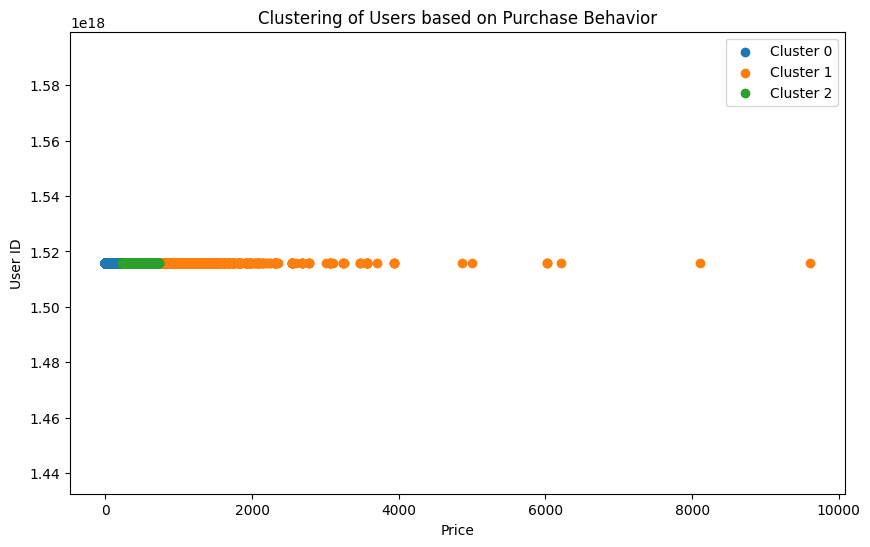

             order_id    product_id   category_id        price       user_id  \
cluster                                                                        
0        2.339696e+18  1.682558e+18  2.271425e+18    68.426235  1.515920e+18   
1        2.338271e+18  1.581037e+18  2.277895e+18  1062.955272  1.515920e+18   
2        2.339133e+18  1.643845e+18  2.282704e+18   387.173043  1.515920e+18   

          weekday  cluster  
cluster                     
0        3.123981      0.0  
1        3.170472      1.0  
2        3.240142      2.0  


In [46]:
# Select relevant features for clustering
features = ['price', 'user_id']

# Preprocess the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Define the number of clusters
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_data)

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['price'], cluster_data['user_id'], label=f'Cluster {cluster}')

plt.xlabel('Price')
plt.ylabel('User ID')
plt.title('Clustering of Users based on Purchase Behavior')
plt.legend()
plt.show()

# Analyze cluster characteristics
numeric_columns = data.select_dtypes(include=['int', 'float']).columns
cluster_means = data.groupby('cluster')[numeric_columns].mean()
print(cluster_means)

## ML Conclusion:

### Clustering Results:

The K-means algorithm divided customers into three distinct clusters based on their purchase behavior.
Each cluster represents a group of customers with similar purchasing patterns and preferences.
Visualizing the clusters in a scatter plot showed clear boundaries between clusters, indicating well-defined segments.
### Cluster Characteristics:

Cluster 0: This cluster may represent customers who make low-value purchases, as indicated by lower average prices. They might include occasional or price-sensitive buyers.
Cluster 1: This cluster likely consists of customers who make high-value purchases, as indicated by higher average prices. They might be loyal or high-spending customers.
Cluster 2: This cluster could represent customers with moderate purchasing behavior falling between Clusters 0 and 1 in terms of average prices.
### Marketing Implications:

Tailored Strategies: Based on the distinct characteristics of each cluster, marketers can develop tailored marketing strategies to engage customers more effectively.
Personalized Offers: Understanding the preferences of each cluster allows for the creation of personalized offers and promotions to incentivize purchases.
Customer Retention: Identifying high-value clusters enables focusing retention efforts on retaining these valuable customers, potentially through loyalty programs or exclusive benefits.
### Further Analysis:

Customer Profiling: Conducting more in-depth analysis, such as demographic profiling or product preferences within each cluster, can provide deeper insights into customer segments.
Evaluation Metrics: Monitoring key performance metrics such as sales revenue, conversion rates, and customer satisfaction within each cluster helps assess the effectiveness of marketing strategies.
Iterative Refinement: Continuously refine clustering models and marketing strategies based on feedback and evolving customer behavior to ensure relevance and effectiveness over time.